<a href="https://colab.research.google.com/github/Varun0801/MachineLearning/blob/master/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np,pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn import tree

In [2]:
bank = pd.read_csv("bankdata.csv")
bank.head()

age  marital  balance loan  contact deposit
0   59  married     2343   no  unknown     yes
1   56  married       45   no  unknown     yes
2   41  married     1270   no  unknown     yes
3   55  married     2476   no  unknown     yes
4   54  married      184   no  unknown     yes

In [3]:
bank.columns

Index(['age', 'marital', 'balance', 'loan', 'contact', 'deposit'], dtype='object')

In [4]:
bank.isnull().sum()

age        0
marital    0
balance    0
loan       0
contact    0
deposit    0
dtype: int64

In [0]:
bank1 = pd.get_dummies(bank,columns=['marital','loan','contact','deposit'],drop_first = True)

In [6]:
bank1.head()

age  balance  ...  contact_unknown  deposit_yes
0   59     2343  ...                1            1
1   56       45  ...                1            1
2   41     1270  ...                1            1
3   55     2476  ...                1            1
4   54      184  ...                1            1

[5 rows x 8 columns]

In [7]:
bank1.columns

Index(['age', 'balance', 'marital_married', 'marital_single', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'deposit_yes'],
      dtype='object')

In [9]:
#randomstate is basically used for reproducing your problem the same every time
from sklearn.model_selection import train_test_split
a,b = np.arange(10).reshape((5,2)),range(5)
print(a)
print(b)


[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
range(0, 5)


In [10]:
train_test_split(a,b)

[array([[6, 7],
        [0, 1],
        [2, 3]]), array([[8, 9],
        [4, 5]]), [3, 0, 1], [4, 2]]

In [11]:
train_test_split(a,b)

[array([[2, 3],
        [4, 5],
        [6, 7]]), array([[0, 1],
        [8, 9]]), [1, 2, 3], [0, 4]]

In [12]:
train_test_split(a,b,random_state=1)

[array([[8, 9],
        [0, 1],
        [6, 7]]), array([[4, 5],
        [2, 3]]), [4, 0, 3], [2, 1]]

In [0]:
trainx,testx,trainy,testy = train_test_split(bank1.iloc[:,:-1],bank1.iloc[:,-1],\
                                             test_size=0.3,random_state=1)


In [0]:
dtc = DecisionTreeClassifier()

In [15]:
dtc.fit(trainx,trainy)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predict_train = dtc.predict(trainx)
predict_test = dtc.predict(testx)

In [17]:
print("Accuracy on train data is",accuracy_score(trainy,predict_train))
print("Accuracy on test data is",accuracy_score(testy,predict_test))

Accuracy on train data is 0.9791373352105466
Accuracy on test data is 0.6136160047775455


In [0]:
predict = dtc.predict(testx)

In [20]:
predict

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [21]:
predict.shape

(3349,)

In [22]:
print(accuracy_score(testy,predict)*100)

61.36160047775455


In [23]:
print(classification_report(testy,predict))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1760
           1       0.59      0.59      0.59      1589

    accuracy                           0.61      3349
   macro avg       0.61      0.61      0.61      3349
weighted avg       0.61      0.61      0.61      3349



In [25]:
from sklearn.tree import export_graphviz
graphviz.Source(export_graphviz(dtc,feature_names=trainx.columns,filled=True,class_names=["0","1"],\
                                out_file=None))


In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(testy,predict))

[[1113  647]
 [ 647  942]]


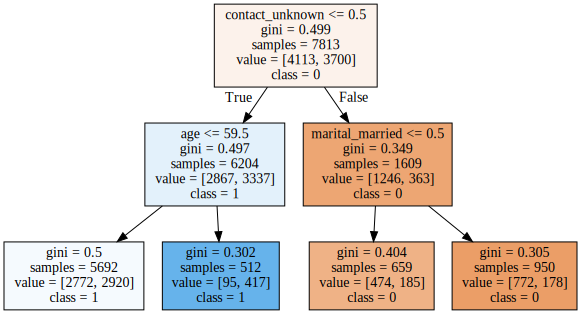

In [27]:
dtc_2 = DecisionTreeClassifier(max_depth=2)
dtc_2.fit(trainx,trainy)
graphviz.Source(export_graphviz(dtc_2,feature_names=trainx.columns,filled=True,class_names=["0","1"],\
                                out_file=None))